# Проект "Компьютерное зрение"

## Библиотеки

В проекте используются нижеприведенные модули.

In [2]:
from ultralytics import YOLO
from PIL import Image
from glob import glob
import json
import pandas as pd

## Построение модели

В зависимости от задачи можно подобрать готовую, предобученную модель YOLO. Полный список моделей - [Models](https://github.com/ultralytics/ultralytics?tab=readme-ov-file). Все модели были созданы и подготовлены с использованием фреймворка PyTorch. Для задачи детектирования объектов оптимальной будет модель **yolov10m.pt** среднего размера, обученная на датасете [Open Image V7](https://docs.ultralytics.com/datasets/detect/open-images-v7/), она обеспечивает приемлемое качество и скорость распознания изображений.

<table>
    <tbody>
        <tr>
            <td>
                <strong>Classification</strong>
            </td>
            <td>
                <strong>Detection</strong>
            </td>
            <td>
                <strong>Segmentation</strong>
            </td>
            <td>
                <strong>Kind</strong>
            </td>
        </tr>
        <tr>
            <td>
                yolov10n-cls.pt
            </td>
            <td>
                yolov10n.pt
            </td>
            <td>
                yolov10n-seg.pt
            </td>
            <td>Nano</td>
        </tr>
        <tr>
            <td>
                yolov10s-cls.pt
            </td>
            <td>
                yolov10s.pt
            </td>
            <td>
                yolov10s-seg.pt
            </td>
            <td>Small</td>
        </tr>
        <tr>
            <td>
                yolov10m-cls.pt
            </td>
            <td>
                <strong>yolov10m.pt
            </td>
            <td>
                yolov10m-seg.pt
            </td>
            <td>Medium</td>
        </tr>
        <tr>
            <td>
                yolov10l-cls.pt
            </td>
            <td>
                yolov10l.pt
            </td>
            <td>
                yolov10l-seg.pt
            </td>
            <td>Large</td>
        </tr>
        <tr>
            <td>
                yolov10x-cls.pt
            </td>
            <td>
                yolov10x.pt
            </td>
            <td>
                yolov10x-seg.pt
            </td>
            <td>Huge</td>
        </tr>
    </tbody>
</table>

Загрузим предварительно обученную YOLO модель

In [3]:
model = YOLO("yolov10m.pt")

100%|██████████| 32.1M/32.1M [00:01<00:00, 33.1MB/s]


Картинки загрузим из папки pics

In [4]:
pictures = glob('../pics/*')
pictures

['../pics\\bike.png',
 '../pics\\cat_dog.jpg',
 '../pics\\crow.jpg',
 '../pics\\dinner_table.jpg']

Выполнение обнаружения объектов на изображении с помощью модели

In [5]:
# Обучение модели с использованием набора данных 'coco128.yaml' на 30 эпохи
# results = model.train(data='coco128.yaml', epochs=30)

'''
Используйте stream=True для обработки длинных видеороликов или больших наборов данных для эффективного управления памятью.
Когда stream=False, результаты для всех кадров или точек данных хранятся в памяти, что может быстро накопиться и вызвать ошибки OOM
переполнения памяти для больших входов. В отличие от этого, stream=True использует генератор, который хранит в памяти результаты
только текущего кадра или точки данных, значительно сокращая потребление памяти и предотвращая проблемы с переполнением памяти.
'''

results = model.predict(pictures, stream=False)


0: 640x640 1 bicycle, 19.3ms
1: 640x640 1 cat, 1 dog, 19.3ms
2: 640x640 1 bird, 19.3ms
3: 640x640 2 cups, 1 fork, 1 knife, 3 spoons, 1 dining table, 19.3ms
Speed: 2.5ms preprocess, 19.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


## Обработка результатов

Посмотрим результаты. Для каждого изображения выведем таблицу с id класса (class), именем класса (name),  вероятностью (confidence) и координатами области внутри которой расположен объект (box).

In [6]:
for path, result in zip(pictures, results):
    boxes = result.boxes  # Объект Boxes для вывода bbox
    masks = result.masks  # Объект Masks для вывода масок сегментации
    keypoints = result.keypoints  # Объект Keypoints для вывода поз
    probs = result.probs  # Объект Probs для вывода вероятностей классификации

    print(f'Изображение: {path}')
    display(pd.read_json(result.tojson()))
    print()

Изображение: ../pics\bike.png


C:\Users\igor_\AppData\Local\Temp\ipykernel_38380\158373597.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  display(pd.read_json(result.tojson()))


name  class  confidence  \
0  bicycle      1     0.97297   

                                                 box  
0  {'x1': 14.281320000000001, 'y1': 24.63865, 'x2...


Изображение: ../pics\cat_dog.jpg


C:\Users\igor_\AppData\Local\Temp\ipykernel_38380\158373597.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  display(pd.read_json(result.tojson()))


name  class  confidence                                                box
0  cat     15     0.92325  {'x1': 140.07759, 'y1': 169.69211, 'x2': 253.9...
1  dog     16     0.86287  {'x1': 262.38797, 'y1': 95.82609, 'x2': 460.80...


Изображение: ../pics\crow.jpg


C:\Users\igor_\AppData\Local\Temp\ipykernel_38380\158373597.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  display(pd.read_json(result.tojson()))


name  class  confidence                                                box
0  bird     14     0.95743  {'x1': 97.89221, 'y1': 48.92153, 'x2': 1011.84...


Изображение: ../pics\dinner_table.jpg


C:\Users\igor_\AppData\Local\Temp\ipykernel_38380\158373597.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  display(pd.read_json(result.tojson()))


name  class  confidence  \
0         spoon     44     0.82003   
1         spoon     44     0.70638   
2           cup     41     0.63892   
3          fork     42     0.55087   
4  dining table     60     0.51370   
5         knife     43     0.45622   
6         spoon     44     0.35155   
7           cup     41     0.25648   

                                                 box  
0  {'x1': 476.40521, 'y1': 125.08585, 'x2': 766.4...  
1  {'x1': 1031.78357, 'y1': 293.82779, 'x2': 1110...  
2  {'x1': 811.36096, 'y1': 21.15908, 'x2': 1008.0...  
3  {'x1': 223.39578, 'y1': 268.81946, 'x2': 278.2...  
4  {'x1': 0.0, 'y1': 2.67198, 'x2': 1282.75842, '...  
5  {'x1': 954.67133, 'y1': 284.05261, 'x2': 992.7...  
6  {'x1': 1031.7218, 'y1': 293.59866, 'x2': 1110....  
7  {'x1': 246.73334, 'y1': 38.35359, 'x2': 456.36...

В **yolov10m** доступно 80 классов объектов которые модель может определить. Словарь классов доступен в result.names. Чтобы вывести русскоязычные наименования классов, загрузим файл data.json.

In [7]:
with open('../data/classes-names.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
# Применим русификацию классов
data = {int(k):v for k,v in data.items()}
for r in results: r.names=data

Каждый полученный результат содержит box'ы объектов. Рассмотрим первую картинку в качестве примера.

In [8]:
result = results[0]

print('Количество обнаруженных объектов:', len(result.boxes))

box = result.boxes[0]
print("ID класса:", box.cls)
print("Координаты:", box.xyxy)
print("Вероятность:", box.conf)

Количество обнаруженных объектов: 1
ID класса: tensor([1.], device='cuda:0')
Координаты: tensor([[ 14.2813,  24.6387, 429.4945, 375.2581]], device='cuda:0')
Вероятность: tensor([0.9730], device='cuda:0')


Отобразим рамки (box'ы) найденных классов на картинках.

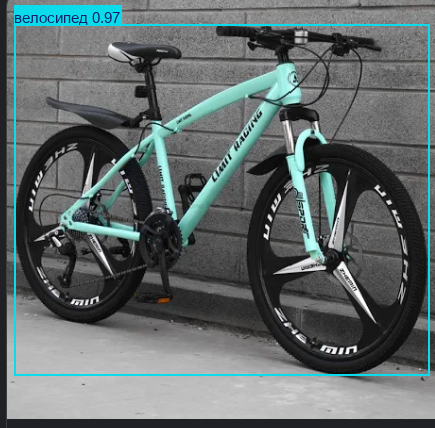

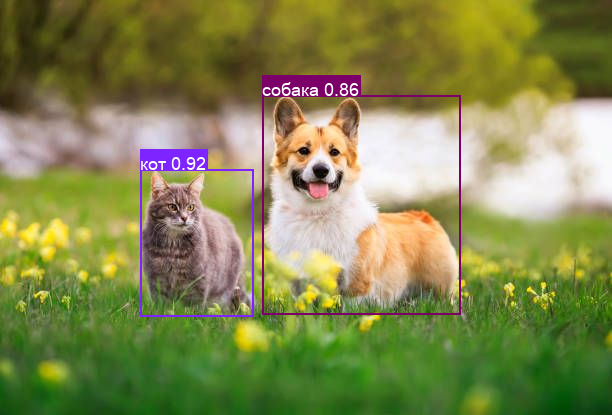

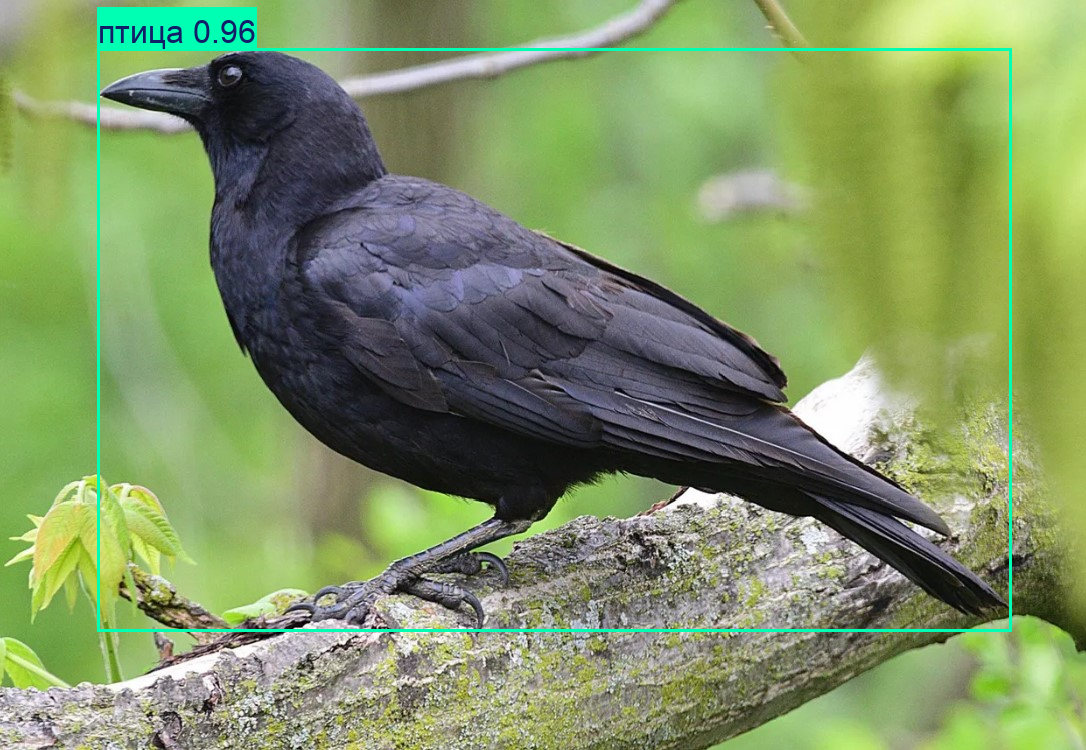

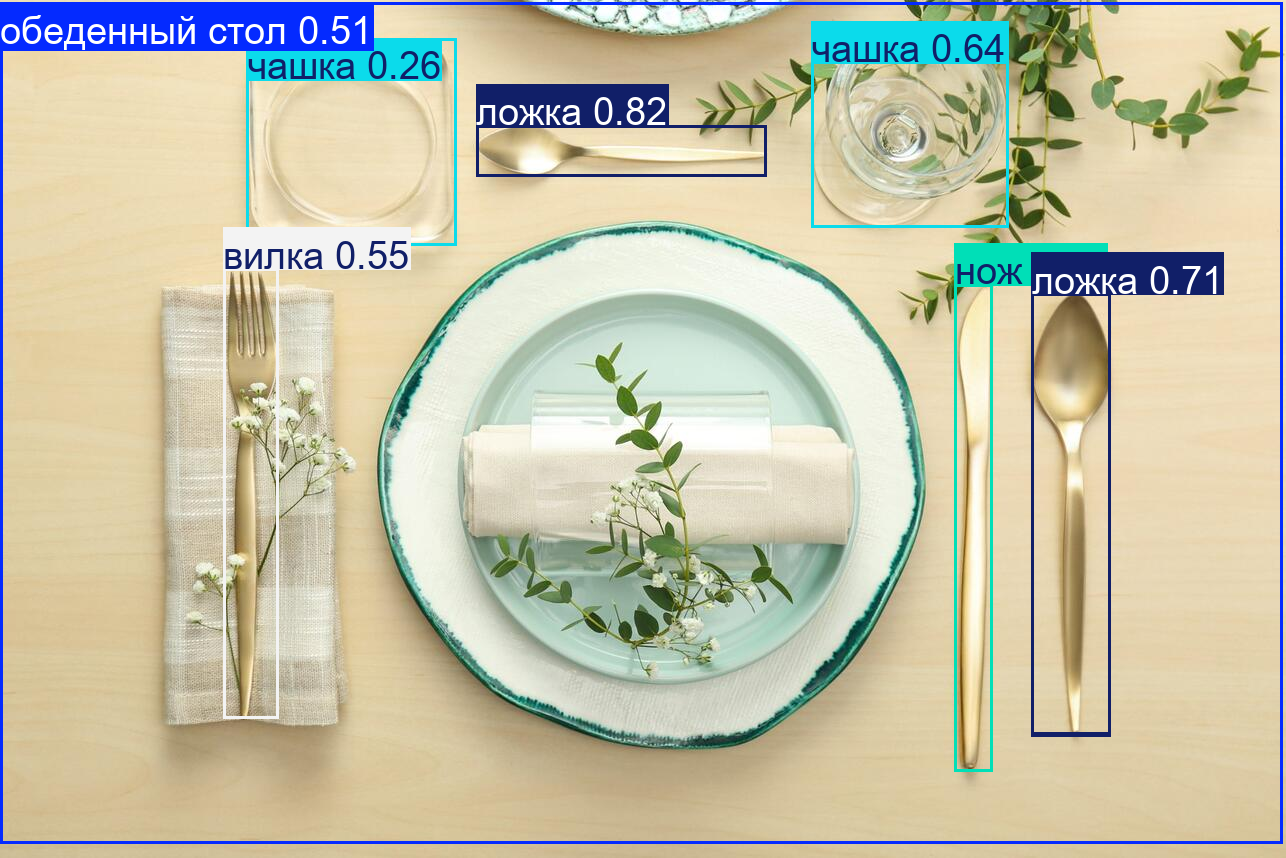

In [9]:
for result in results:
    img = Image.fromarray(result.plot()[:,:,::-1])
    display(img)